In [6]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('data_single_first_record.csv',header=None)
stimulus =pd.read_csv('stimulus_single_first_record.csv',header=None)

In [7]:
stimulus

,0,1,2
0,2382.006197,1,4
1,2384.054293,100,1
2,2386.293988,3,2
3,2387.365545,100,1
4,2389.550053,2,4
...,...,...,...
195,2742.199593,100,1
196,2744.340725,7,3
197,2745.909398,100,1
198,2748.035291,0,4


In [8]:
stimulus.columns = ["timestamp","num_intervals","marker"]

In [9]:
stimulus["num_intervals"]

0        1
1      100
2        3
3      100
4        2
      ... 
195    100
196      7
197    100
198      0
199    100
Name: num_intervals, Length: 200, dtype: int64

In [10]:
#npy has shape [temporal edge+1, edge feature dimension], similarily, node npy has has[node+1, node feature dimension]

In [11]:
from scipy import signal

def highpassfilter(df_eeg_selected):
    # Define filter parameters
    fs = 250.0  # Sampling frequency
    highcut = 1.0  # High-pass filter cutoff frequency
    order = 4  # Filter order
    # Apply high-pass filter to dataframe
    return df_eeg_selected.apply(lambda x: signal.filtfilt(*signal.butter(order, highcut / (fs / 2), btype='highpass'), x))

def apply_lowpass_filter(df_eeg_selected, cutoff_freq=50, order=4, fs=250.0):
    # Define filter parameters
    nyquist_freq = 0.5 * fs
    cutoff = cutoff_freq / nyquist_freq

    # Apply filter to dataframe
    b, a = signal.butter(order, cutoff, btype='lowpass')
    df_filtered = df_eeg_selected.apply(lambda x: signal.filtfilt(b, a, x))
    
    # Return filtered dataframe
    return df_filtered


In [12]:
timestamps = df.iloc[:, 0].values  # Assuming timestamps are in the first column
eeg_data = df.iloc[:, 1:].values  # Assuming EEG data starts from the second column


In [13]:
eeg_data_mv = eeg_data / 1e6

Creating RawArray with float64 data, n_channels=8, n_times=96094
    Range : 0 ... 96093 =      0.000 ...   375.363 secs
Ready.
Using matplotlib as 2D backend.


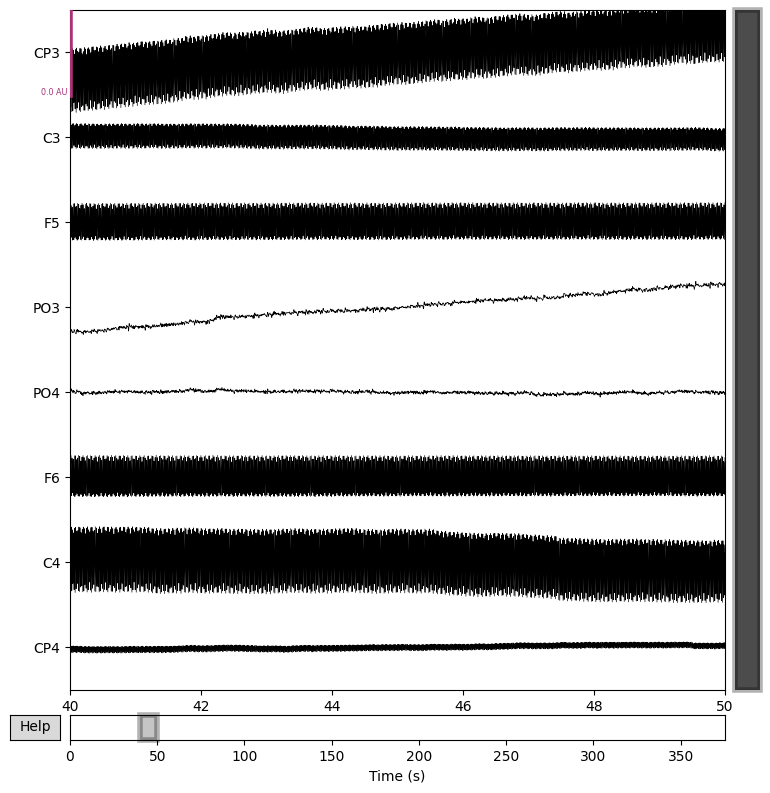

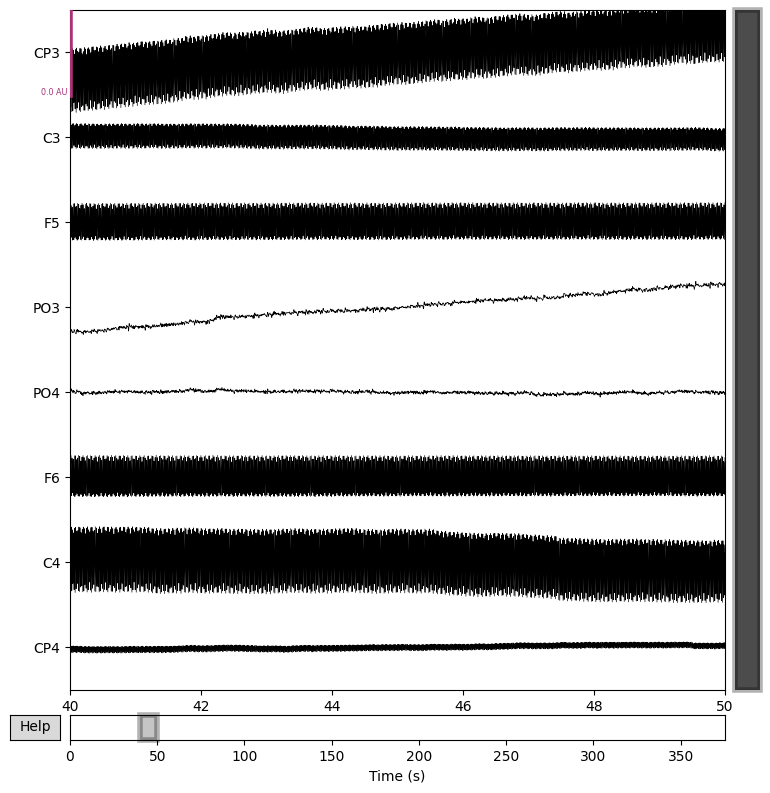

In [14]:
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.ion() #Makes plot interactive
# Scale the EEG data to the desired range (e.g., -1 to 1)
eeg_data = eeg_data_mv / (np.max(np.abs(eeg_data), axis=0))
# Define channel names (replace with your channel names)
channel_names = ["CP3", "C3", "F5", "PO3", "PO4", "F6", "C4", "CP4"]

# Define the sampling frequency (e.g., 1000 Hz for 1 kHz data)
sfreq = 256

# Create an info object
info = mne.create_info(channel_names, sfreq)

# Create an MNE Raw object
raw = mne.io.RawArray(eeg_data.T, info)
scalings = {'eeg': 1e-8, 'misc': 1e-3}
raw.plot(n_channels=8,start=40, duration=10)



In [15]:
print(raw.info)

<Info | 7 non-empty values
 bads: []
 ch_names: CP3, C3, F5, PO3, PO4, F6, C4, CP4
 chs: 8 misc
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 256.0 Hz
>


Creating RawArray with float64 data, n_channels=8, n_times=96094
    Range : 0 ... 96093 =      0.000 ...   375.363 secs
Ready.


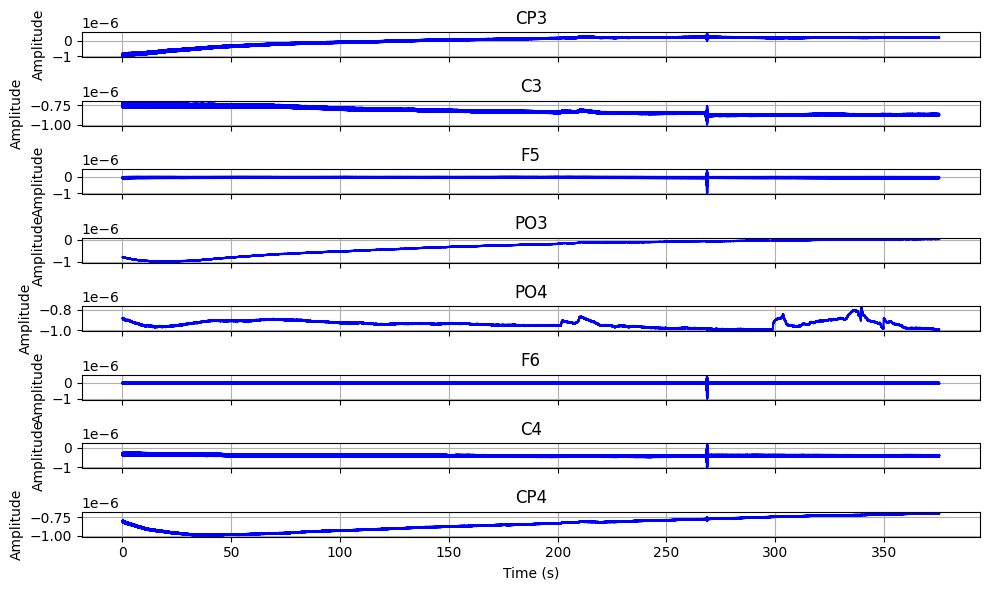

In [16]:
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Scale the EEG data to the desired range (e.g., -1 to 1)
#eeg_data_mv= eeg_data / (np.max(np.abs(eeg_data), axis=0))

# Define channel names (replace with your channel names)
channel_names = ["CP3", "C3", "F5", "PO3", "PO4", "F6", "C4", "CP4"]

# Define the sampling frequency (e.g., 1000 Hz for 1 kHz data)
sfreq = 256

# Create an info object
info = mne.create_info(channel_names, sfreq)

# Create an MNE Raw object
raw = mne.io.RawArray(eeg_data.T, info)

# Define the time range you want to plot (start and end in seconds)
start_time = 60
end_time = 63

# Select the data within the specified time range
#raw.crop(tmin=start_time, tmax=end_time)

# Create a custom plot
fig, axes = plt.subplots(nrows=len(channel_names), ncols=1, figsize=(10, 6), sharex=True)

for i, ch_name in enumerate(channel_names):
    ax = axes[i]
    data, times = raw[ch_name, :]
    ax.plot(times, data.T, color='b')
    ax.set_title(ch_name)
    ax.set_ylabel('Amplitude')
    ax.grid(True)

plt.xlabel('Time (s)')
plt.tight_layout()
plt.show()


Creating RawArray with float64 data, n_channels=8, n_times=96094
    Range : 0 ... 96093 =      0.000 ...   375.363 secs
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_676/3991921734.py:30: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  raw.pick_channels(channels_to_plot)


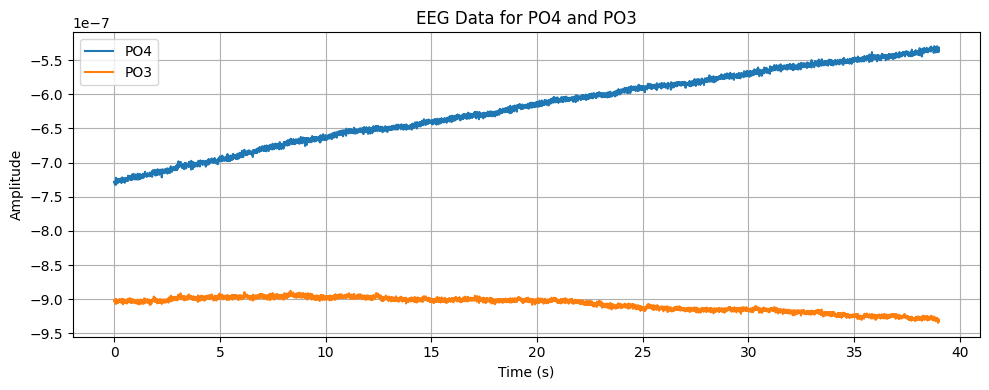

In [17]:
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Scale the EEG data to the desired range (e.g., -1 to 1)
eeg_data_mv = eeg_data / (np.max(np.abs(eeg_data), axis=0))

# Define channel names (replace with your channel names)
channel_names = ["CP3", "C3", "F5", "PO3", "PO4", "F6", "C4", "CP4"]

# Define the sampling frequency (e.g., 1000 Hz for 1 kHz data)
sfreq = 256

# Create an info object
info = mne.create_info(channel_names, sfreq)

# Create an MNE Raw object
raw = mne.io.RawArray(eeg_data.T, info)

# Define the time range you want to plot (start and end in seconds)
start_time = 61
end_time = 100

# Select the data within the specified time range
raw.crop(tmin=start_time, tmax=end_time)

# Select only the "PO4" and "PO3" channels
channels_to_plot = ["PO4", "PO3"]
raw.pick_channels(channels_to_plot)

# Create a custom plot for the selected channels
fig, ax = plt.subplots(figsize=(10, 4))
data, times = raw.get_data(return_times=True)
for i, ch_name in enumerate(channels_to_plot):
    ax.plot(times, data[i, :], label=ch_name)

ax.set_title('EEG Data for PO4 and PO3')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


In [18]:
raw

<RawArray | 2 x 9985 (39.0 s), ~163 kB, data loaded>

In [19]:
eeg_data.shape

(96094, 8)

In [20]:
stimulus

,timestamp,num_intervals,marker
0,2382.006197,1,4
1,2384.054293,100,1
2,2386.293988,3,2
3,2387.365545,100,1
4,2389.550053,2,4
...,...,...,...
195,2742.199593,100,1
196,2744.340725,7,3
197,2745.909398,100,1
198,2748.035291,0,4


In [21]:
stimulus[stimulus["num_intervals"]!=100]

,timestamp,num_intervals,marker
0,2382.006197,1,4
2,2386.293988,3,2
4,2389.550053,2,4
6,2393.821203,4,3
8,2397.545730,9,1
...,...,...,...
190,2733.284485,6,4
192,2737.474267,9,2
194,2740.649894,3,3
196,2744.340725,7,3


Creating RawArray with float64 data, n_channels=8, n_times=96094
    Range : 0 ... 96093 =      0.000 ...   375.363 secs
Ready.


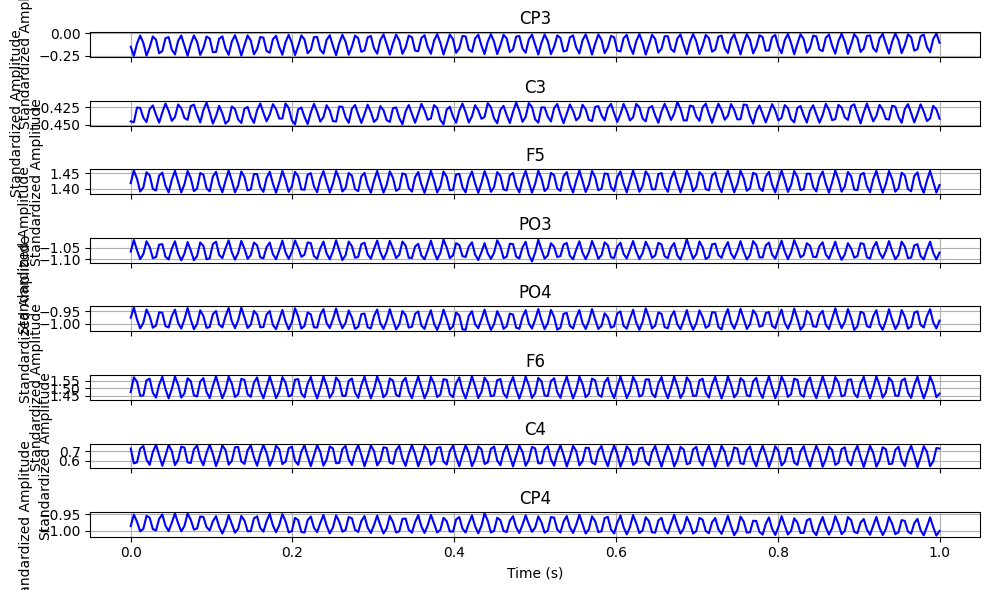

In [22]:
from sklearn.preprocessing import StandardScaler
eeg_data = eeg_data_mv / (np.max(np.abs(eeg_data), axis=0))

# Define channel names (replace with your channel names)
channel_names = ["CP3", "C3", "F5", "PO3", "PO4", "F6", "C4", "CP4"]

# Define the sampling frequency (e.g., 1000 Hz for 1 kHz data)
sfreq = 256

# Create an info object
info = mne.create_info(channel_names, sfreq)

# Create an MNE Raw object
raw = mne.io.RawArray(eeg_data.T, info)
scaler = StandardScaler()
eeg_data_standardized = scaler.fit_transform(raw.get_data())

# Update the data in the Raw object with the standardized data
raw._data = eeg_data_standardized

# Define the time range you want to plot (start and end in seconds)
start_time = 22
end_time = 23

# Select the data within the specified time range
raw.crop(tmin=start_time, tmax=end_time)

# Create a custom plot with standardized data
fig, axes = plt.subplots(nrows=len(channel_names), ncols=1, figsize=(10, 6), sharex=True)

for i, ch_name in enumerate(channel_names):
    ax = axes[i]
    data, times = raw[ch_name, :]
    ax.plot(times, data.T, color='b')
    ax.set_title(ch_name)
    ax.set_ylabel('Standardized Amplitude')
    ax.grid(True)

plt.xlabel('Time (s)')
plt.tight_layout()
plt.show()

In [23]:
import mne
import scipy.io

# Load the .mat file containing electrode locations
mat_data = scipy.io.loadmat('5f_data/5F-SubjectE-160321-5St-SGLHand-HFREQ.mat')

# Extract electrode location data (adjust variable names as needed)
electrode_positions = mat_data['electrode_positions']  # Replace with the actual variable name

# Create an MNE Info object (replace with your specific parameters)
sfreq = 256  # Sampling frequency
channel_names = ["CP3", "C3", "F5", "PO3", "PO4", "F6", "C4", "CP4"]  # Replace with your channel names
info = mne.create_info(channel_names, sfreq)

# Create an MNE Montage and assign electrode locations (assuming XYZ coordinates)
montage = mne.channels.make_dig_montage(ch_pos=dict(zip(channel_names, electrode_positions)), coord_frame='head')
info.set_montage(montage)

# Create an MNE Raw object for your EEG data (replace with your data loading code)
# raw_data = ...  # Load your EEG data
raw = mne.io.RawArray(raw_data, info)

# Now you have a Raw object with electrode locations associated with it


KeyError: 'electrode_positions'

In [24]:
import mne
import scipy.io

# Load the .mat file containing electrode locations
mat_data = scipy.io.loadmat('5f_data/5F-SubjectE-160321-5St-SGLHand-HFREQ.mat')

mat_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Mon Mar 21 17:18:50 2016',
 '__version__': '1.0',
 '__globals__': [],
 'o': array([[(array(['201603211551.D091BB44'], dtype='<U21'), array(['NK-data import (auto)'], dtype='<U21'), array([[1000]], dtype=uint16), array([[3585000]], dtype=int32), array([[0],
                [0],
                [0],
                ...,
                [0],
                [0],
                [0]], dtype=uint8), array([[-0.  , -0.  , -0.  , ..., -0.  , -0.  , -0.  ],
                [-0.  , -0.  , -0.  , ..., -0.  , -0.  , -0.  ],
                [-0.  , -0.  , -0.  , ..., -0.  , -0.  , -0.  ],
                ...,
                [ 0.96,  3.97,  1.67, ...,  1.05, -0.59, -0.  ],
                [ 0.96,  3.96,  1.66, ...,  1.05, -0.58, -0.  ],
                [ 0.95,  3.95,  1.66, ...,  1.05, -0.58, -0.  ]]), array([[array(['Fp1'], dtype='<U3')],
                [array(['Fp2'], dtype='<U3')],
                [array(['F3'], dtype='<U2')],


In [25]:
o_data = mat_data['o']

# Access data within 'o' (assuming 'o' is the main data structure you're interested in)
id_data = o_data['id']
tag_data = o_data['tag']
samp_freq_data = o_data['sampFreq']
nS_data = o_data['nS']
marker_data = o_data['marker']
data_data = o_data['data']
chnames_data = o_data['chnames']
binsuV_data = o_data['binsuV']
print( binsuV_data)

[[array([[1]], dtype=uint8)]]


In [27]:
eeg_data = data_data[0][0]
chnames = chnames_data[0][0]
channel_name_arrays=chnames.tolist()
channel_names = [name[0] for name in channel_name_arrays]
channel_names = [name[0] for name in channel_names]

In [28]:
markers = [marker[0] for marker in marker_data][0]

In [29]:
markers

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=uint8)

In [30]:
unique_values = np.unique(markers)
#//count how many times each unique value appears in markers
unique_value_counts = np.array([(markers == value).sum() for value in unique_values])
unique_value_counts

array([2100525,  269116,  223827,  256204,  244587,  244519,  240052,
          1026,    5144])

In [31]:
len(markers)

3585000

In [32]:
unique_values 
#99: “initial relaxation,” 91: “inter-session breaks,” 92: “experiment end.” 

array([ 0,  1,  2,  3,  4,  5, 91, 92, 99], dtype=uint8)

In [105]:
freq=samp_freq_data[0][0][0][0]
info = mne.create_info(channel_names, freq)
raw = mne.io.RawArray(eeg_data.T, info)

Creating RawArray with float64 data, n_channels=22, n_times=3585000
    Range : 0 ... 3584999 =      0.000 ...  3584.999 secs
Ready.


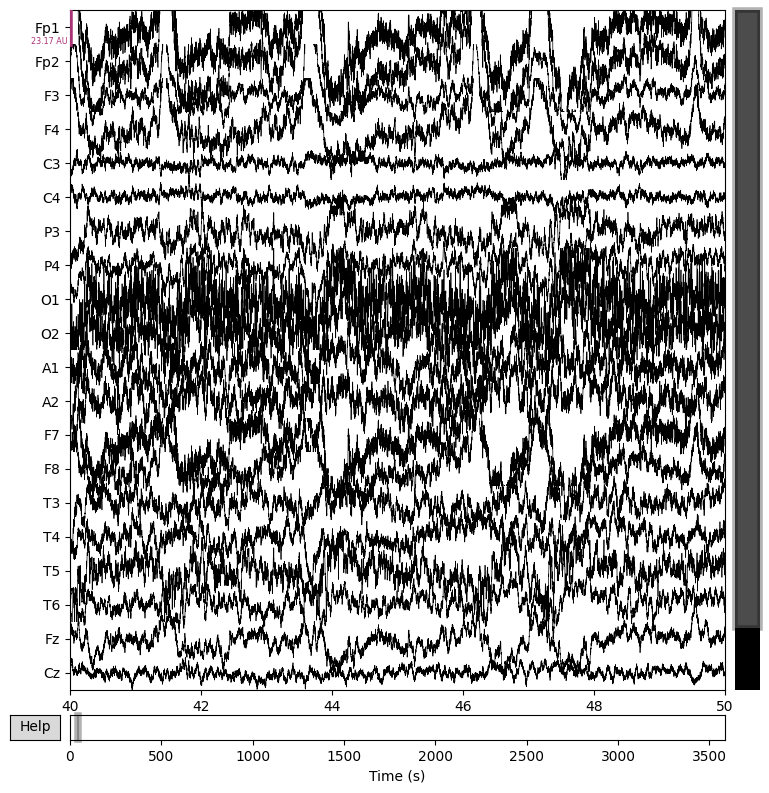

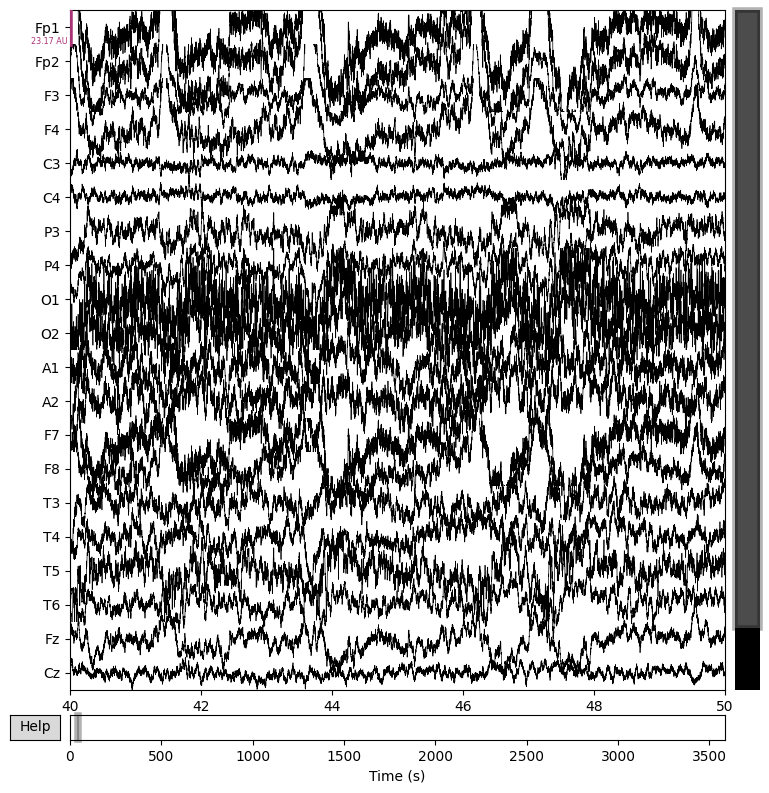

In [34]:
raw.plot(start=40, duration=10)

In [35]:
montage =  mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)

/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_676/2512959148.py:2: RuntimeWarning: Not setting positions of 21 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'A1', 'A2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


<RawArray | 22 x 3585000 (3585.0 s), ~601.8 MB, data loaded>

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


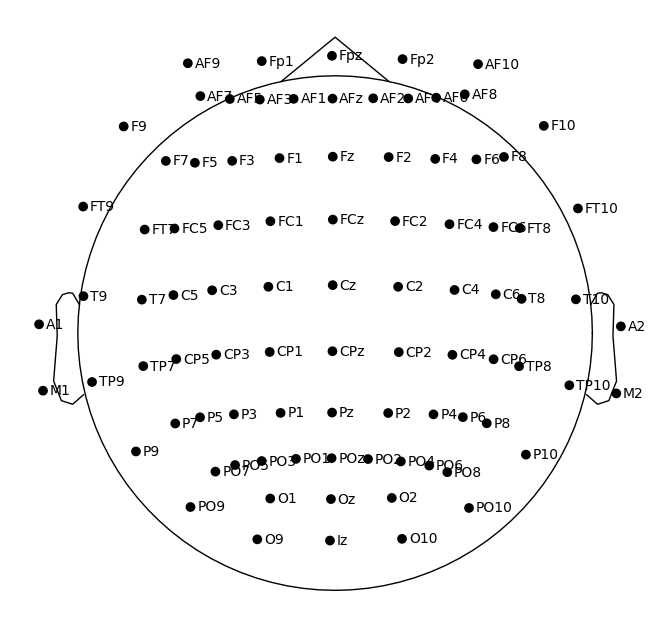

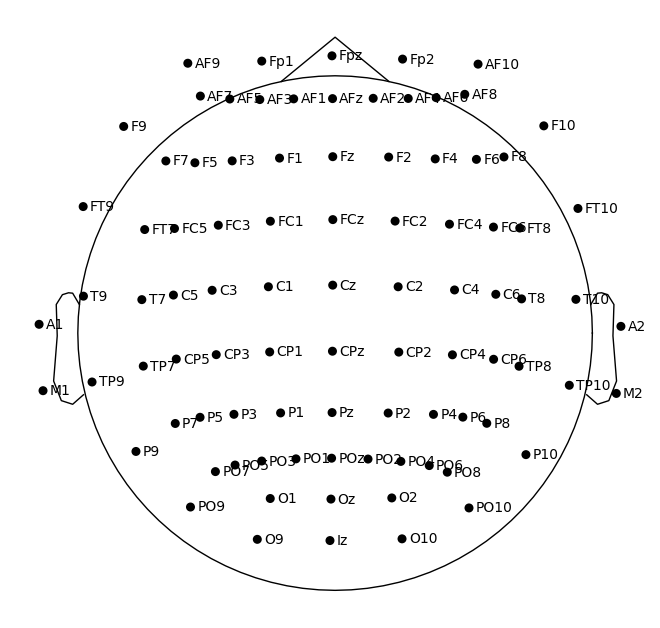

In [36]:
montage.plot()

In [88]:
import numpy as np
import pandas as pd

# Your data array
data_array = markers

# Initialize variables to keep track of the current value and its count
current_value = None
current_count = 0
value_counts = []
current_pos = 0

# Iterate through the data array
for pos, value in enumerate(data_array.flatten()):
    if value == current_value:
        # Increment the count for consecutive occurrences
        current_count += 1
    else:
        # If a new value is encountered, add the previous value and count to the list
        if current_value is not None:
            value_counts.append((current_value, current_count,current_pos))
        # Reset count for the new value
        current_value = value
        current_pos = pos
        current_count = 1
        

# Add the last value and its count to the list
if current_value is not None:
    value_counts.append((current_value, current_count, current_pos))

# Create a DataFrame to present the consecutive counts in a table format
counts_table = pd.DataFrame(value_counts, columns=['Value', 'Consecutive Count','onset'])

# Print the table
print(counts_table)
csv_file_path = 'consecutive_counts.csv'

# Use the to_csv method to save the DataFrame to a CSV file
counts_table.to_csv(csv_file_path, index=False)

      Value  Consecutive Count    onset
0         0             148576        0
1        99               1029   148576
2         0               4013   149605
3        99               1025   153618
4         0               3014   154643
...     ...                ...      ...
1924      0               2341  3574010
1925      5               1281  3576351
1926      0                  2  3577632
1927     92               1026  3577634
1928      0               6340  3578660

[1929 rows x 3 columns]


In [38]:
markers[3576350]

array([0], dtype=uint8)

In [39]:
counts_table[counts_table["Value"]==99]

,Value,Consecutive Count,onset
1,99,1029,148576
3,99,1025,153618
5,99,1028,157657
7,99,1032,160696
9,99,1030,162740


In [40]:
counts_table[counts_table["Value"].isin ([1,2,3,4,5,0])]['Value']

0       0
2       0
4       0
6       0
8       0
       ..
1923    5
1924    0
1925    5
1926    0
1928    0
Name: Value, Length: 1921, dtype: uint8

In [41]:
positions_in_samples = counts_table[counts_table["Value"].isin ([1,2,3,4,5,0])]['onset']

In [42]:
events = counts_table[counts_table["Value"].isin ([1,2,3,4,5,0])]['Value']

In [43]:
event_arr = np.array([positions_in_samples, np.zeros(len(positions_in_samples)), events]).T.astype(int)

In [44]:
event_arr

array([[      0,       0,       0],
       [ 149605,       0,       0],
       [ 154643,       0,       0],
       ...,
       [3576351,       0,       5],
       [3577632,       0,       0],
       [3578660,       0,       0]])

In [45]:

index_first_one = np.argmax(event_arr[:, 2] == 1)
index_first_one
event_arr= event_arr[index_first_one:]


In [46]:
event_arr
np.savetxt("eventarr.csv", event_arr, delimiter=",", fmt='%d')

In [47]:
# so one second first is edge one, second edge edge 2

In [106]:
for ch in raw.ch_names:
    raw.set_channel_types({ch: 'eeg'})

print(raw.get_channel_types())

['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg']


/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_676/1200785031.py:2: RuntimeWarning: The unit for channel(s) Fp1 has changed from NA to V.
  raw.set_channel_types({ch: 'eeg'})
/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_676/1200785031.py:2: RuntimeWarning: The unit for channel(s) Fp2 has changed from NA to V.
  raw.set_channel_types({ch: 'eeg'})
/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_676/1200785031.py:2: RuntimeWarning: The unit for channel(s) F3 has changed from NA to V.
  raw.set_channel_types({ch: 'eeg'})
/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_676/1200785031.py:2: RuntimeWarning: The unit for channel(s) F4 has changed from NA to V.
  raw.set_channel_types({ch: 'eeg'})
/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_676/1200785031.py:2: RuntimeWarning: The unit for channel(s) C3 has changed from NA to V.
  raw.set_channel_types({ch: 'eeg'})
/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_676/12007

In [99]:
print(raw.get_channel_types())

['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg']


In [145]:
channels_to_drop = ['O1', 'O2', 'A1', 'A2','X5']
#referenced
raw.set_channel_types({'A2': 'eog'})
raw.set_channel_types({'A1': 'eog'})
raw.set_eeg_reference(ref_channels=['A1', 'A2'])
raw.notch_filter([60, 120], method='fir', fir_design='firwin')
raw.filter(l_freq=0.5, h_freq=50, method='fir', fir_design='firwin')

raw = raw.pick_channels(ch_names=[ch for ch in raw.ch_names if ch not in channels_to_drop])

montage =  mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)

#mne resample  
raw_resampled = raw.copy().resample(250.0, npad='auto')

epochs = mne.Epochs(raw_resampled, events=event_arr, event_id=None, tmin=0, tmax=1, baseline=None, preload=True,proj=False)

ValueError: This channel name (A2) doesn't exist in info.

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Need more than one channel to make topography for eeg. Disabling interactivity.


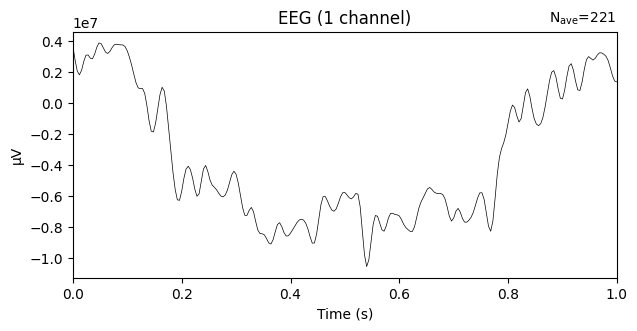

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Need more than one channel to make topography for eeg. Disabling interactivity.


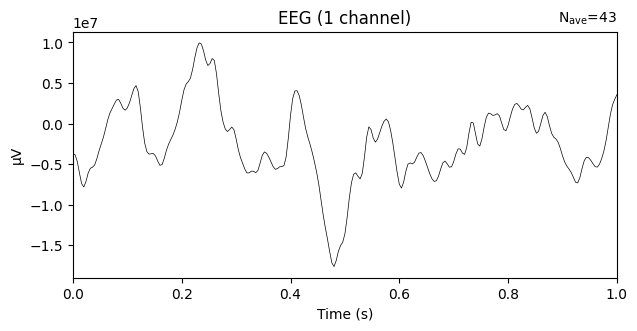

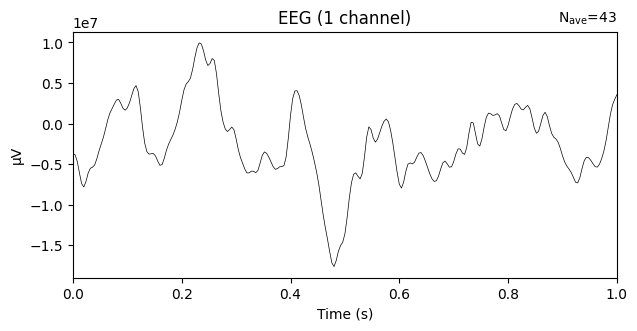

In [147]:
epochs["0"].average(picks=['C3']).plot(ylim=[-1,1])
epochs["5"].average(picks=['C3']).plot(ylim=[-1,1])

Not setting metadata
221 matching events found
No baseline correction applied
Not setting metadata
43 matching events found
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)


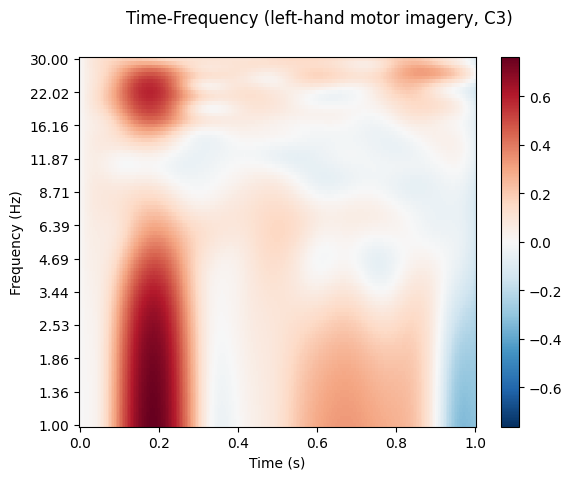

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)


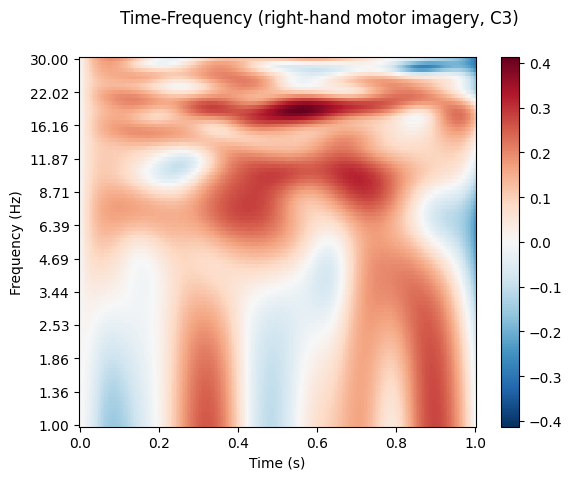

In [148]:
import mne
from mne.time_frequency import tfr_morlet
import numpy as np

def plot_hand_motor_imagery(epochs, left_epoch_ids, right_epoch_ids, channel, freqs, n_cycles, baseline=(0, 0)):
    """
    Perform time-frequency analysis on motor imagery epochs and plot the results.

    Parameters:
    - epochs: The loaded epochs data.
    - left_epoch_ids: Range or list of epoch IDs for left-hand motor imagery.
    - right_epoch_ids: Range or list of epoch IDs for right-hand motor imagery.
    - channel: The name of the channel to analyze (e.g., 'C3').
    - freqs: Frequencies of interest for the Morlet wavelets.
    - n_cycles: Number of cycles for the Morlet wavelets.
    - baseline: Tuple indicating the time interval to apply baseline. Default is (0, 0).

    This function plots the time-frequency representation for the specified conditions.
    """

    # Extract the relevant epochs for left-hand and right-hand motor imagery
    left_hand_epochs = mne.concatenate_epochs([epochs[str(i)] for i in left_epoch_ids])
    right_hand_epochs = mne.concatenate_epochs([epochs[str(i)] for i in right_epoch_ids])

    # Select the data just for the specified channel
    left_hand_epochs_ch = left_hand_epochs.copy().pick_channels([channel])
    right_hand_epochs_ch = right_hand_epochs.copy().pick_channels([channel])

    # Compute the time-frequency representation using Morlet wavelets for both hands
    power_left = tfr_morlet(left_hand_epochs_ch, freqs=freqs, n_cycles=n_cycles, return_itc=False)
    power_right = tfr_morlet(right_hand_epochs_ch, freqs=freqs, n_cycles=n_cycles, return_itc=False)

    # Plot the results (average across all epochs for the given condition)
    power_left.plot(baseline=baseline, mode='logratio', title=f'Time-Frequency (left-hand motor imagery, {channel})',cmap='RdBu_r')
    power_right.plot(baseline=baseline, mode='logratio', title=f'Time-Frequency (right-hand motor imagery, {channel})',cmap='RdBu_r')


plot_hand_motor_imagery(
    epochs=epochs,  # your epochs data
    left_epoch_ids=[0],  # or list of specific epoch numbers for left hand
    right_epoch_ids=[5],  # or list of specific epoch numbers for right hand
    channel='C3',
    freqs=np.logspace(*np.log10([1, 30]), num=100),  # frequencies of interest
    n_cycles=np.logspace(*np.log10([1, 30]), num=100) / 2.  # number of cycles for each frequency
)

Not setting metadata
400 matching events found
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)


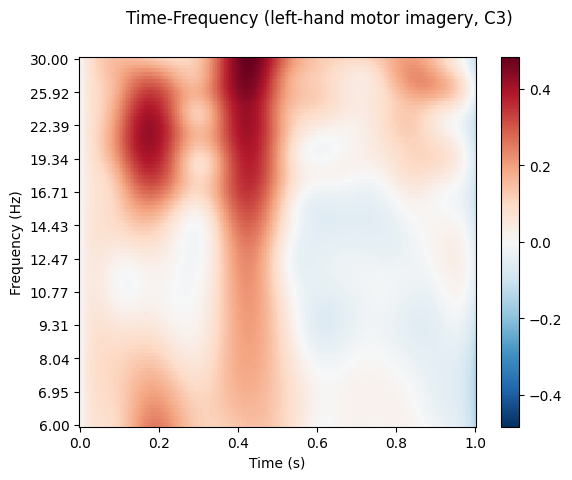

[<Figure size 640x480 with 2 Axes>]

In [146]:
import mne
from mne.time_frequency import tfr_morlet
import numpy as np

# Assuming 'epochs' is your loaded epochs data
# Extract the relevant epochs for left-hand motor imagery
left_hand_epochs_list = [epochs[str(i)] for i in range(5)]  # Selecting epochs from "0" to "4"

# Concatenate the epochs into one single Epochs object
left_hand_epochs_all = mne.concatenate_epochs(left_hand_epochs_list)

# Now, select the data just for channel 'C3'
left_hand_epochs_c3 = left_hand_epochs_all.copy().pick_channels(['C3'])

# Define frequencies of interest (log-spaced) and the number of cycles for each frequency
frequencies = np.logspace(*np.log10([6, 30]), num=100)  # Adjust this range based on your interest
n_cycles = frequencies / 2.  # number of cycles at each frequency, here defined as freq/2

# Compute the time-frequency representation using Morlet wavelets
power = tfr_morlet(left_hand_epochs_c3, freqs=frequencies, n_cycles=n_cycles, return_itc=False)

# Plot the results (average across all epochs for the given condition)
power.plot(baseline=(0, 0), mode='logratio', title='Time-Frequency (left-hand motor imagery, C3)')


In [65]:
epochs["1"].avergae().plot()

AttributeError: 'Epochs' object has no attribute 'avergae'

In [63]:
epochs.get_data().shape

(443, 22, 251)

In [51]:
raw_resampled

<RawArray | 22 x 896250 (3585.0 s), ~150.5 MB, data loaded>

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


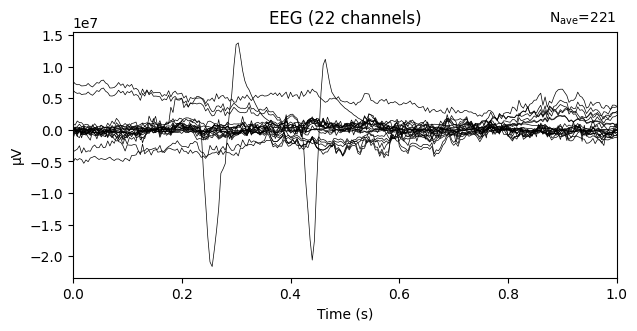

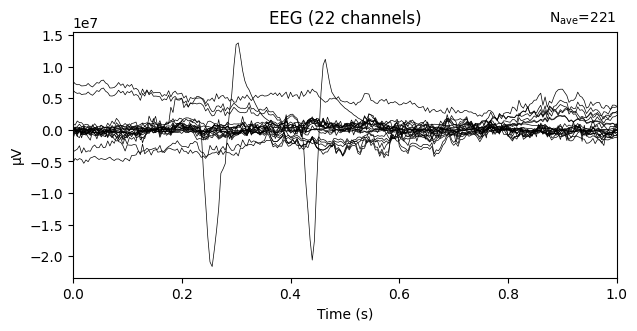

In [52]:

epochs["0"].average(picks='all').plot()

In [53]:
raw.ch_names

['Fp1',
 'Fp2',
 'F3',
 'F4',
 'C3',
 'C4',
 'P3',
 'P4',
 'O1',
 'O2',
 'A1',
 'A2',
 'F7',
 'F8',
 'T3',
 'T4',
 'T5',
 'T6',
 'Fz',
 'Cz',
 'Pz',
 'X5']

In [54]:
finger1=epochs["1"].average(picks='all').get_data()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [55]:
finger1.shape

(22, 251)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


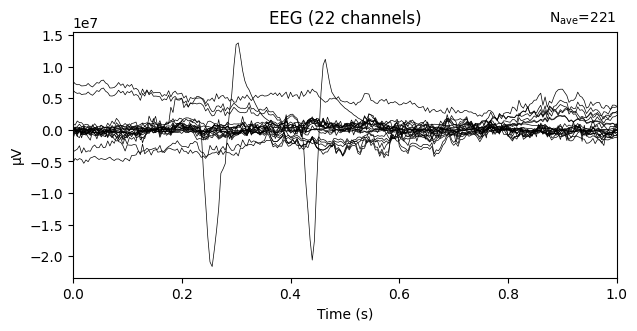

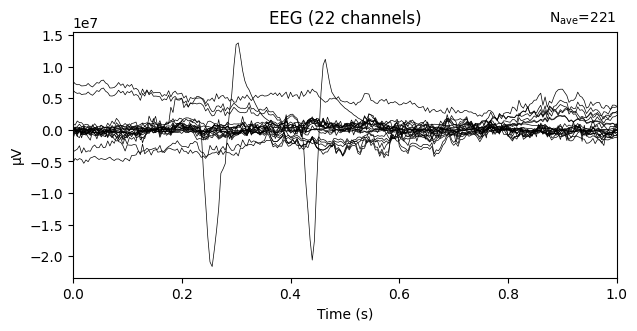

In [56]:
epochs["0"].average(picks='all').plot()

In [57]:
ch_names = montage.ch_names
pos = montage.get_positions()

In [58]:
pos['ch_pos']['Fp1']

array([-0.0294367,  0.0839171, -0.00699  ])

In [59]:
import math
import torch


def positionalencoding2d(d_model, height, width):
    """
    :param d_model: dimension of the model
    :param height: height of the positions
    :param width: width of the positions
    :return: d_model*height*width position matrix
    """
    if d_model % 4 != 0:
        raise ValueError("Cannot use sin/cos positional encoding with "
                         "odd dimension (got dim={:d})".format(d_model))
    pe = torch.zeros(d_model, height, width)
    # Each dimension use half of d_model
    d_model = int(d_model / 2)
    div_term = torch.exp(torch.arange(0., d_model, 2) *
                         -(math.log(10000.0) / d_model))
    pos_w = torch.arange(0., width).unsqueeze(1)
    pos_h = torch.arange(0., height).unsqueeze(1)
    pe[0:d_model:2, :, :] = torch.sin(pos_w * div_term).transpose(0, 1).unsqueeze(1).repeat(1, height, 1)
    pe[1:d_model:2, :, :] = torch.cos(pos_w * div_term).transpose(0, 1).unsqueeze(1).repeat(1, height, 1)
    pe[d_model::2, :, :] = torch.sin(pos_h * div_term).transpose(0, 1).unsqueeze(2).repeat(1, 1, width)
    pe[d_model + 1::2, :, :] = torch.cos(pos_h * div_term).transpose(0, 1).unsqueeze(2).repeat(1, 1, width)

    return pe


In [60]:
pos['ch_pos']['Fp1']

array([-0.0294367,  0.0839171, -0.00699  ])

In [61]:
import math
import torch

def positionalencoding3d(d_model, x, y, z):
    if d_model % 6 != 0:
        raise ValueError("Cannot use sin/cos positional encoding with odd dimension (got dim={:d})".format(d_model))
    
    # Calculate the positional encodings for X, Y, and Z separately
    x_encoding = torch.sin(x * (2 ** torch.arange(0, d_model, 3) / d_model))
    y_encoding = torch.cos(y * (2 ** torch.arange(1, d_model, 3) / d_model))
    z_encoding = torch.sin(z * (2 ** torch.arange(2, d_model, 3) / d_model))

    # Combine the encodings
    position_encoding = x_encoding + y_encoding + z_encoding
    
    return position_encoding



In [62]:
# Specify the dimensionality of the encoding
d_model = 12
embeddings = [] 
# Calculate the positional encoding
for name in raw.ch_names:
    x=pos['ch_pos'][name][0]
    y=pos['ch_pos'][name][1]
    z=pos['ch_pos'][name][2]
    print(name,x,y)
    position_encoded = positionalencoding3d(d_model,x,y,z)
    embeddings.append(position_encoded)

embeddings = torch.stack(embeddings)


Fp1 -0.0294367 0.08391710000000001
Fp2 0.029872299999999997 0.0848959
F3 -0.0502438 0.0531112
F4 0.0518362 0.0543048
C3 -0.06535809999999999 -0.0116317
C4 0.06711790000000001 -0.0109003
P3 -0.0530073 -0.0787878
P4 0.0556667 -0.0785602
O1 -0.0294134 -0.112449
O2 0.0298426 -0.112156
A1 -0.0860761 -0.0249897
A2 0.08579389999999999 -0.025009299999999998
F7 -0.0702629 0.0424743
F8 0.0730431 0.0444217
T3 -0.0841611 -0.0160187
T4 0.0850799 -0.0150203
T5 -0.0724343 -0.0734527
T6 0.0730557 -0.07306829999999999
Fz 0.0003122 0.058512
Cz 0.0004009 -0.009167
Pz 0.0003247 -0.08111499999999999


KeyError: 'X5'

In [ ]:
print(embeddings.shape)

torch.Size([17, 4])


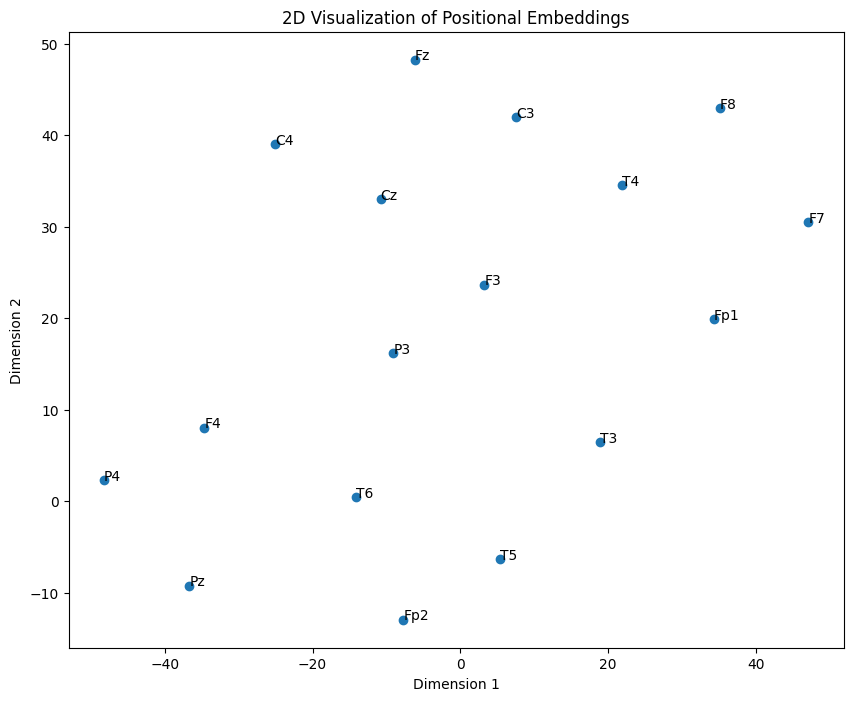

In [ ]:

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=10, random_state=0)
embeddings_2d = tsne.fit_transform(embeddings)


# Create a scatterplot for visualization
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])

# Label each point with the electrode name
for i, name in enumerate(raw.ch_names):
    plt.annotate(name, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.title("2D Visualization of Positional Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


In [ ]:
embeddings.shape

torch.Size([17, 4])

In [ ]:
epochs["1"].average(picks='all').get_data().shape

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


(17, 251)

encoded_positions[ch_name] = position_encoded

In [ ]:
from gnnbackup import module


class TimeEncode(torch.nn.Module):
    def __init__(self, expand_dim, factor=5):
        super(TimeEncode, self).__init__()
        #init_len = np.array([1e8**(i/(time_dim-1)) for i in range(time_dim)])
        
        time_dim = expand_dim
        self.factor = factor
        self.basis_freq = torch.nn.Parameter((torch.from_numpy(1 / 10 ** np.linspace(0, 9, time_dim))).float())
        self.phase = torch.nn.Parameter(torch.zeros(time_dim).float())
        
        #self.dense = torch.nn.Linear(time_dim, expand_dim, bias=False)

        #torch.nn.init.xavier_normal_(self.dense.weight)
        
    def forward(self, ts):
        # ts: [N, L]
        batch_size = ts.size(0)
        seq_len = ts.size(1)
                
        ts = ts.view(batch_size, seq_len, 1)# [N, L, 1]
        map_ts = ts * self.basis_freq.view(1, 1, -1) # [N, L, time_dim]
        map_ts += self.phase.view(1, 1, -1)
        
        harmonic = torch.cos(map_ts)

        return harmonic #self.dense(harmonic)
    

In [ ]:
num_channels = 17
num_timesteps = 1000


# Create a random example input tensor ([17, 10])
input_tensor = torch.randn(1, 1000)

In [ ]:
finger1_ttensor = torch.from_numpy(epochs["1"].average(picks='all').get_data()) 

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [ ]:
finger1_tensor[:1,-1000:].shape

torch.Size([1, 1000])

In [ ]:
time_encoder = TimeEncode(expand_dim=6)

#time_embeddings = time_encoder(finger1_tensor[:1,-1000:])


In [ ]:
from sklearn.decomposition import PCA

# Assuming you want to reduce to 2 dimensions for visualization
pca = PCA(n_components=3)
reduced_embeddings = pca.fit_transform(time_embeddings.view(-1, 10).detach().numpy())

# Now you can plot the reduced embeddings
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
plt.title('PCA-Reduced Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

NameError: name 'time_embeddings' is not defined

In [ ]:
electrode_embeddings_expanded.shape

torch.Size([17, 1000, 10])

In [ ]:
time_embeddings.shape   

torch.Size([1, 1000, 2])

In [ ]:
electrode_embeddings=embeddings
time_embeddings_expanded = time_embeddings.expand(17, -1, -1)
electrode_embeddings_expanded = electrode_embeddings.unsqueeze(1).expand(-1, 1000, -1)
combined_embeddings = torch.cat([time_embeddings_expanded, electrode_embeddings_expanded], dim=2)

In [ ]:
(combined_embeddings.)shape

torch.Size([17, 1000, 10])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have combined_embeddings with shape [17, 1000, 32]
# You want to visualize the embeddings for a specific second, e.g., second 5

# Choose the second you want to visualize (e.g., second 5)
second_to_visualize = 9  # Adjust as needed

# Extract the embeddings for the selected second
embeddings_at_second = combined_embeddings[:, 899, :3]

print(embeddings_at_second.shape)
# Detach the tensor from gradient computation and convert to NumPy array
embeddings_at_second_np = embeddings_at_second.detach().numpy()

# Plot the embeddings
plt.figure(figsize=(10, 6))
plt.imshow(embeddings_at_second_np, cmap='viridis', aspect='auto')
plt.title(f'Embeddings at Second {second_to_visualize}')
plt.xlabel('Feature Dimension')
plt.ylabel('Channel')
plt.colorbar()
plt.show()


NameError: name 'combined_embeddings' is not defined

In [ ]:
nodefeatures=[]
rawerps=[]
for event in [0,1,2,3,4,5]:
    finger_tensor = torch.from_numpy(epochs[str(event)].average(picks='all').get_data()) 
    rawerps.append(finger_tensor)
    time_embeddings = time_encoder(finger_tensor[:1,:])
    electrode_embeddings=embeddings
    time_embeddings_expanded = time_embeddings.expand(17, -1, -1)
    electrode_embeddings_expanded = electrode_embeddings.unsqueeze(1).expand(-1, 251, -1)
    combined_embeddings = torch.cat([time_embeddings_expanded, electrode_embeddings_expanded], dim=2)
    print(combined_embeddings.shape)

    combined_feature = torch.cat((finger_tensor.unsqueeze(-1), combined_embeddings), dim=-1)
    print(combined_feature.shape)
    flattened_embeddings = combined_feature.view(-1)
    print(flattened_embeddings.shape)
    flattened_embeddings_np = flattened_embeddings.detach().numpy()
    nodefeatures.append(flattened_embeddings_np)

nodefeatures_array = np.array(nodefeatures)
erps_array = np.array(rawerps)
print(nodefeatures_array.shape)
np.save('ml_5f_node.npy', nodefeatures_array)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
torch.Size([17, 251, 10])
torch.Size([17, 251, 11])
torch.Size([46937])
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
torch.Size([17, 251, 10])
torch.Size([17, 251, 11])
torch.Size([46937])
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
torch.Size([17, 251, 10])
torch.Size([17, 251, 11])
torch.Size([46937])
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
torch.Size([17, 251, 10])
torch.Size([17, 251, 11])
torch.Size([46937])
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
torch.Size([17, 251, 10])
torch.Size([17, 251, 11])
torch.Size([46937])
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
torch.Size([17, 251, 10])
torch.Size([17, 251, 11])
torch.Size([46937])
(6, 46937)


In [ ]:
erps_array.shape

(5, 17, 251)

In [ ]:
nodefeatures_array.reshape(5,17,251,-1).shape  

(5, 17, 251, 11)

In [ ]:
import numpy as np

# Embedded Data
embedded_data = nodefeatures_array.reshape(5,17,251,-1)  # replace with your data

# Reshape Data
N, C, T, D = embedded_data.shape
reshaped_data = embedded_data.reshape(N*C*T, D)

# Create labels for each of the 5 groups
labels = np.array([[i] * (C * T) for i in range(N)]).flatten()


In [ ]:
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2, perplexity=30, n_iter=300).fit_transform(reshaped_data)

/Users/gongqianxi/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gongqianxi/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gongqianxi/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


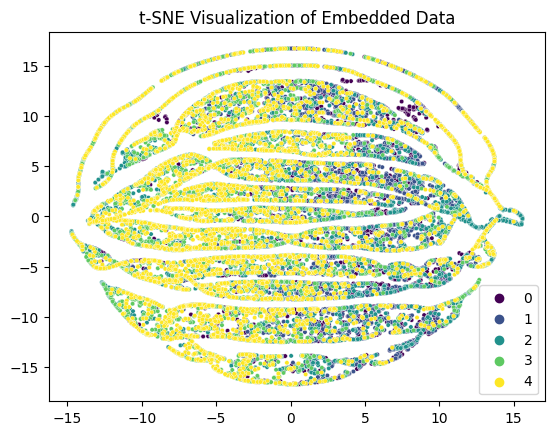

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels, palette='viridis', s=10)
plt.title('t-SNE Visualization of Embedded Data')
plt.show()


In [ ]:
nodefeatures[0].shape

#Similarly, `ml_${DATA_NAME}_node.npy` has shape of [#nodes + 1, node features dimension].
#`ml_${DATA_NAME}_e


torch.Size([17, 1000, 20])

In [ ]:
#add embeddings
#which hand 

epochs["5"].average(picks=['C3']).getdata().shape

NameError: name 'epochs' is not defined

In [ ]:
#now get node feature csv and node feature.npy
#node feature npy has shape [node+1, node feature dimension]
#u, i, ts, label, idx``
#which represents source node index, target node index, time stamp, edge label and the edge index. 
#The edge label is 1 if the edge exists, otherwise 0.

event_arr
# Now, `timestamps` is a 1D NumPy array containing the timestamps (in seconds) of each event.


array([[ 166189,       0,       1],
       [ 169014,       1,       0],
       [ 171430,       0,       4],
       ...,
       [3576351,       0,       5],
       [3577632,       5,       0],
       [3578660,       0,       0]])

In [ ]:
#0 is when nothing is on gui
df = pd.DataFrame(event_arr, columns=['timestamps', 'source', 'target'])

df

,timestamps,source,target
0,166189,0,1
1,169014,1,0
2,171430,0,4
3,172726,4,0
4,174335,0,2
...,...,...,...
1910,3572717,0,5
1911,3574010,5,0
1912,3576351,0,5
1913,3577632,5,0


In [ ]:
for i in range(len(df['source'])):
    if i % 2 != 0:
        df['source'][i] = df['target'][i-1]
        print(df['source'][i])

1
4
2
5
1
5
5
3
4
4
5
4
4
4
4
2
1
4
5
3
4
1
3
4
2
4
1
5
3
4
3
5
3
1
5
5
5
1
4
2
3
5
4
2
1
3
5
3
1
1
2
1
2
4
3
2
1
3
1
1
1
5
1
2
3
1
1
5
3
5
2
3
2
1
3
5
3
2
2
4
2
1
5
3
2
5
1
4
4
3
4
4
2
4
5
3
3
3
5
4
5
2
5
4
2
3
5
2
2
2
3
5
3
2
3
4
2
2
3
1
5
5
3
2
5
3
3
4
2
1
5
1
2
1
1
3
4
5
4
1
3
5
4
5
1
5
3
5
3
1
1
3
5
4
4
5
5
3
1
1
5
1
3
4
2
1
1
2
3
5
1
2
3
3
2
4
4
1
5
1
5
1
3
1
4
1
3
3
2
2
4
5
4
3
5
5
3
3
1
3
3
4
4
1
3
3
4
3
1
4
1
1
3
3
3
4
2
2
4
2
4
2
4
4
5
3
3
2
3
1
3
2
1
2
2
1
1
4
3
4
4
2
2
4
3
4
4
5
2
3
5
2
5
3
3
3
3
2
1
3
2
4
5
1
4
3
5
2
4
2
3
1
2
4
4
4
3
2
2
5
5
4
5
2
4
2
3
4
5
3
3
1
4
4
3
1
4
1
1
5
5
3
5
1
4
3
5
3
3
4
2
1
4
5
4
5
1
5
5
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [ ]:
df.columns = ["ts","u","i"] #u, i, ts, label, idx`` edge label and the edge index. 
df

,ts,u,i
0,166189,0,1
1,169014,1,0
2,171430,0,4
3,172726,4,0
4,174335,0,2
...,...,...,...
1910,3572717,0,5
1911,3574010,5,0
1912,3576351,0,5
1913,3577632,5,0


In [ ]:
import pandas as pd



# Initialize empty lists to store edge labels and edge indices
edge_labels = []
edge_indices = []

# Iterate through the DataFrame
for index, row in df.iterrows():
    u = row['u']
    i = row['i']
    
    # Skip rows where both u and i are zero, as they don't represent edges
    
    edge_labels.append(f'u{u}_i{i}')
    edge_indices.append(index)

# Create a new DataFrame for edge labels and indices
edges_df = pd.DataFrame({'Edge_Label': edge_labels, 'Edge_Index': edge_indices})

# Display the resulting DataFrame
print(edges_df)


     Edge_Label  Edge_Index
0         u0_i1           0
1         u1_i0           1
2         u0_i4           2
3         u4_i0           3
4         u0_i2           4
...         ...         ...
1910      u0_i5        1910
1911      u5_i0        1911
1912      u0_i5        1912
1913      u5_i0        1913
1914      u0_i0        1914

[1915 rows x 2 columns]


In [ ]:

# Horizontal Concatenation (Side by Side)
new_df = pd.concat([df, edges_df], axis=1)

In [ ]:
new_df

,ts,u,i,Edge_Label,Edge_Index
0,166189,0,1,u0_i1,0
1,169014,1,0,u1_i0,1
2,171430,0,4,u0_i4,2
3,172726,4,0,u4_i0,3
4,174335,0,2,u0_i2,4
...,...,...,...,...,...
1910,3572717,0,5,u0_i5,1910
1911,3574010,5,0,u5_i0,1911
1912,3576351,0,5,u0_i5,1912
1913,3577632,5,0,u5_i0,1913


In [ ]:
new_df.to_csv('ml_5f.csv', index=False)

In [ ]:
epochs

Number of events,443
Events,0: 2211: 462: 373: 534: 435: 43
Time range,0.000 – 1.000 s
Baseline,off


In [ ]:
edgefeature = epochs.get_data()
#dropped so gotta try different way


In [ ]:
raw_resampled.get_data().shape

(17, 896250)

In [ ]:
edgefeatures=[]
for i in new_df['ts']:
    edgefeatures.append(raw_resampled.get_data()[:,i:i+251])

NameError: name 'new_df' is not defined

In [ ]:
edgefeatures.shape

In [ ]:
edgefeature.shape

(443, 17, 251)

In [ ]:
embeddings.shape

torch.Size([17, 4])

In [ ]:
edgetensor = edgefeature.reshape(17,-1,1)

In [ ]:
electrode_embeddings_expanded = embeddings.unsqueeze(1).expand(-1, 111193, -1)

In [ ]:
combined_data = torch.cat((electrode_embeddings_expanded, torch.from_numpy(edgetensor)), dim=2)

In [ ]:
combined_data.view(443,-1).shape
#(443, 17, 251)

torch.Size([443, 21335])

In [ ]:
#temporal edges + 1, edge features dimention]

In [ ]:
combined_data = torch.cat((embeddings.unsqueeze(2), edgefeature.unsqueeze(1)), dim=2)
combined_data.shape
torch.Size([17, 251, 10])

AttributeError: 'numpy.ndarray' object has no attribute 'unsqueeze'